In [1]:
'''
Next word prediction is like -
'''

'\nNext word prediction is like -\n'

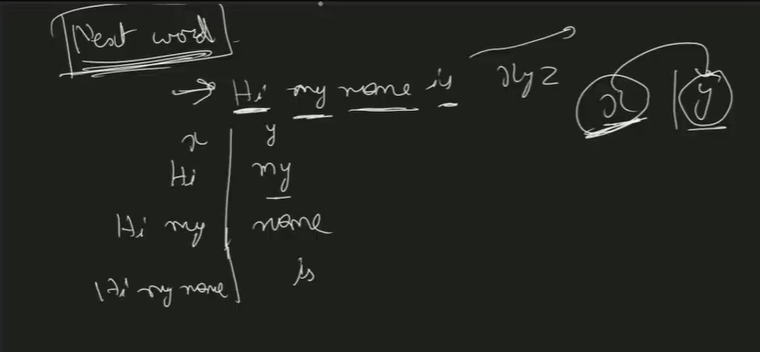

In [2]:
'''
Next tokenizing this data.
'''

'\nNext tokenizing this data.\n'

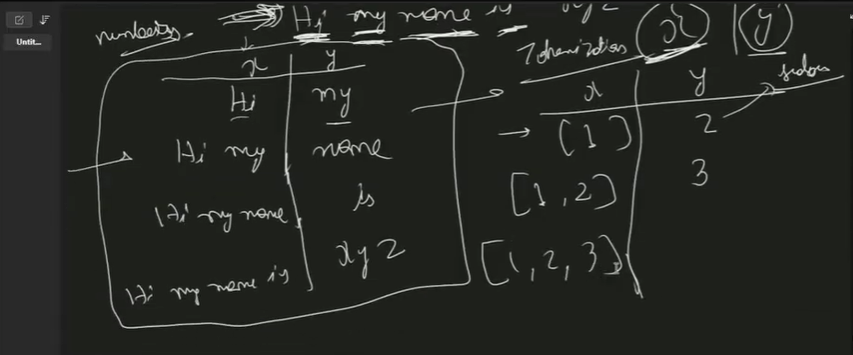

In [3]:
# Importing libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [4]:
# Dataset Loading
with open('1661-0.txt') as f:
    docs = f.read()

In [5]:
docs

'\ufeff\nProject Gutenberg\'s The Adventures of Sherlock Holmes, by Arthur Conan Doyle\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.net\n\n\nTitle: The Adventures of Sherlock Holmes\n\nAuthor: Arthur Conan Doyle\n\nRelease Date: November 29, 2002 [EBook #1661]\nLast Updated: May 20, 2019\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n*** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***\n\n\n\nProduced by an anonymous Project Gutenberg volunteer and Jose Menendez\n\n\n\ncover\n\n\n\nThe Adventures of Sherlock Holmes\n\n\n\nby Arthur Conan Doyle\n\n\n\nContents\n\n\n   I.     A Scandal in Bohemia\n   II.    The Red-Headed League\n   III.   A Case of Identity\n   IV.    The Boscombe Valley Mystery\n   V.     The Five Orange Pips\n   VI.    The Man wi

In [6]:
# text preprocessing

def preprocess_pipeline(text_data):

    r = re.sub('[^\w\s]', '', text_data) # leaving alphabets and spaces, if u find any other character replace it by nothing.

    return r

In [7]:
docs = preprocess_pipeline(docs)
docs

'\nProject Gutenbergs The Adventures of Sherlock Holmes by Arthur Conan Doyle\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever  You may copy it give it away or\nreuse it under the terms of the Project Gutenberg License included\nwith this eBook or online at wwwgutenbergnet\n\n\nTitle The Adventures of Sherlock Holmes\n\nAuthor Arthur Conan Doyle\n\nRelease Date November 29 2002 EBook 1661\nLast Updated May 20 2019\n\nLanguage English\n\nCharacter set encoding UTF8\n\n START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES \n\n\n\nProduced by an anonymous Project Gutenberg volunteer and Jose Menendez\n\n\n\ncover\n\n\n\nThe Adventures of Sherlock Holmes\n\n\n\nby Arthur Conan Doyle\n\n\n\nContents\n\n\n   I     A Scandal in Bohemia\n   II    The RedHeaded League\n   III   A Case of Identity\n   IV    The Boscombe Valley Mystery\n   V     The Five Orange Pips\n   VI    The Man with the Twisted Lip\n   VII   The Advent

In [8]:
#Initializing tokenizer

tokenizer = Tokenizer()

In [9]:
# Sentence tokenization

tokenizer.fit_on_texts([docs]) # assigns unique number to each word and put in a dictionary..

In [10]:
# Let's check each tokens
tokenizer.word_index

{'the': 1,
 'and': 2,
 'i': 3,
 'of': 4,
 'to': 5,
 'a': 6,
 'in': 7,
 'that': 8,
 'it': 9,
 'you': 10,
 'he': 11,
 'was': 12,
 'his': 13,
 'is': 14,
 'my': 15,
 'have': 16,
 'with': 17,
 'as': 18,
 'had': 19,
 'at': 20,
 'which': 21,
 'for': 22,
 'not': 23,
 'but': 24,
 'be': 25,
 'me': 26,
 'this': 27,
 'we': 28,
 'from': 29,
 'there': 30,
 'said': 31,
 'upon': 32,
 'holmes': 33,
 'so': 34,
 'him': 35,
 'her': 36,
 'she': 37,
 'all': 38,
 'your': 39,
 'very': 40,
 'no': 41,
 'been': 42,
 'on': 43,
 'what': 44,
 'by': 45,
 'one': 46,
 'then': 47,
 'are': 48,
 'were': 49,
 'an': 50,
 'would': 51,
 'when': 52,
 'out': 53,
 'up': 54,
 'do': 55,
 'man': 56,
 'could': 57,
 'has': 58,
 'if': 59,
 'or': 60,
 'into': 61,
 'who': 62,
 'mr': 63,
 'little': 64,
 'will': 65,
 'some': 66,
 'now': 67,
 'see': 68,
 'down': 69,
 'may': 70,
 'our': 71,
 'should': 72,
 'they': 73,
 'us': 74,
 'well': 75,
 'am': 76,
 'over': 77,
 'can': 78,
 'about': 79,
 'more': 80,
 'think': 81,
 'must': 82,
 'shall':

In [11]:
len(tokenizer.word_index) # gives length of dictionary with unique tokens.

8717

In [12]:
tokenizer.word_index['out']

53

In [13]:
tokenizer.word_index['could']


57

In [31]:
# but if we will try a word which is not present in the current input text,
# it will give error.
# tokenizer.word_index['himalaya']
# so gpts are trained on very big dataset. Also this takes alot of time and money, so we will use pretrained models like BERT,etc.

In [ ]:
for sentence in docs.split('\n'):
  print(tokenizer.texts_to_sequences([sentence])[0]) # the list whih has assigned no number has empty list.

In [15]:
# Splitting text on the basis of sentence and performing sentence tokenization
# For sentence tokenization , nltk or spacy can be used.
# i have done on \n. But when doing , dont do this way.
input_sequences = []
for sentence in docs.split('\n'): # now we r splitting sentence on \n and not on . because during preprocessing we removed . .
  tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0] # converting each sentence into collection of numbers.

  for i in range(1,len(tokenized_sentence)):
    input_sequences.append(tokenized_sentence[:i+1])

In [16]:
input_sequences # here the sequences are not of same length, so we will pad it.

[[136, 4605],
 [136, 4605, 1],
 [136, 4605, 1, 953],
 [136, 4605, 1, 953, 4],
 [136, 4605, 1, 953, 4, 123],
 [136, 4605, 1, 953, 4, 123, 33],
 [136, 4605, 1, 953, 4, 123, 33, 45],
 [136, 4605, 1, 953, 4, 123, 33, 45, 523],
 [136, 4605, 1, 953, 4, 123, 33, 45, 523, 2107],
 [136, 4605, 1, 953, 4, 123, 33, 45, 523, 2107, 2108],
 [27, 954],
 [27, 954, 14],
 [27, 954, 14, 22],
 [27, 954, 14, 22, 1],
 [27, 954, 14, 22, 1, 268],
 [27, 954, 14, 22, 1, 268, 4],
 [27, 954, 14, 22, 1, 268, 4, 374],
 [27, 954, 14, 22, 1, 268, 4, 374, 2109],
 [27, 954, 14, 22, 1, 268, 4, 374, 2109, 20],
 [27, 954, 14, 22, 1, 268, 4, 374, 2109, 20, 41],
 [27, 954, 14, 22, 1, 268, 4, 374, 2109, 20, 41, 1572],
 [27, 954, 14, 22, 1, 268, 4, 374, 2109, 20, 41, 1572, 2],
 [27, 954, 14, 22, 1, 268, 4, 374, 2109, 20, 41, 1572, 2, 17],
 [543, 41],
 [543, 41, 3239],
 [543, 41, 3239, 3240],
 [543, 41, 3239, 3240, 10],
 [543, 41, 3239, 3240, 10, 70],
 [543, 41, 3239, 3240, 10, 70, 769],
 [543, 41, 3239, 3240, 10, 70, 769, 9],


In [17]:
max_len = max([len(x) for x in input_sequences])
max_len

18

In [18]:
# padding sequences to make all sentences of same length.
padded_input_sequences = pad_sequences(input_sequences, maxlen = max_len, padding='pre')# post. generally pre is preferred.

In [19]:
padded_input_sequences

array([[   0,    0,    0, ...,    0,  136, 4605],
       [   0,    0,    0, ...,  136, 4605,    1],
       [   0,    0,    0, ..., 4605,    1,  953],
       ...,
       [   0,    0,    0, ...,    5,  336,   79],
       [   0,    0,    0, ...,  336,   79,  333],
       [   0,    0,    0, ...,   79,  333, 1569]], dtype=int32)

In [20]:
X = padded_input_sequences[:,:-1] #all the rows of all the cols except last col.

In [21]:
y = padded_input_sequences[:,-1] #the last col is target

In [22]:
X.shape

(97929, 17)

In [23]:
y.shape

(97929,)

In [23]:
# now this is a classification problem. Because we have to tell what will be next word.
# its a multiclass classification problem. where the number of classes are equal to number of tokens.
# now currently y is containing numbers which u can assume to be some classes.
# so we will need to one hot encode these classes.
# in our case , we have 8718 classes. so we will generate

In [24]:

y = to_categorical(y,num_classes=8718)

In [25]:
y.shape

(97929, 8718)

In [26]:
model = Sequential()
model.add(Embedding(8718, 100, input_length=17))
model.add(LSTM(150))
model.add(Dense(8718, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.fit(X,y,epochs=100,validation_split=0.3)

Epoch 1/100
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.0587 - loss: 6.6706 - val_accuracy: 0.0858 - val_loss: 6.2382
Epoch 2/100
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.1026 - loss: 5.7279 - val_accuracy: 0.1163 - val_loss: 6.0959
Epoch 3/100
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.1340 - loss: 5.2727 - val_accuracy: 0.1278 - val_loss: 6.1319
Epoch 4/100
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.1530 - loss: 4.9045 - val_accuracy: 0.1301 - val_loss: 6.2006
Epoch 5/100
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - accuracy: 0.1737 - loss: 4.5923 - val_accuracy: 0.1294 - val_loss: 6.3335
Epoch 6/100
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.1968 - loss: 4.2679 - val_accuracy: 0.1293 - val_loss: 6.4702
Epoch 7/100
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.2171 - loss: 3.9889 - val_accuracy: 0.1291 - val_loss: 6.6102
Epoch 8/100
2143/2143 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.24

In [30]:
import time
import numpy as np

text = "Sherlock"

for i in range(10):
  # tokenize
  token_text = tokenizer.texts_to_sequences([text])[0]
  # padding
  padded_token_text = pad_sequences([token_text], maxlen=56, padding='pre')
  # predict
  pos = np.argmax(model.predict(padded_token_text))

  for word,index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)
      time.sleep(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Sherlock holmes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Sherlock holmes was
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Sherlock holmes was already
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Sherlock holmes was already at
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Sherlock holmes was already at breakfast
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Sherlock holmes was already at breakfast when
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Sherlock holmes was already at breakfast when i
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Sherlock holmes was already at breakfast when i came
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Sherlock holmes was already at breakfast when i came down
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Sherlock holmes was already at breakfast when i came down the
